# Part I - Ford GoBike System Data
## by Njeri Macharia

### Table of Contents
1. [Introduction](#Introduction)
2. [Preliminary Wrangling](#PreliminaryWrangling)

   2.1 [Gathering and Assessing Data](#GatheringandAssessingData)
   
   2.2 [Data Cleaning](#DataCleaning) 
3. [Structure and Features of the DataSet](#StructureAndFeatures)
4. [Univariate Exploration](#UnivariateExploration)
5. [Bivariate Exploration](#BivariateExploration)
6. [Multivariate Exploration](#MultivariateExploration)
7. [Conclusions](#Conclusions)




## Introduction
<a id="Introduction"></a>
> This project explores and analyses a dataset containing the Ford GoBike System Data. Ford GoBike is a regional public bike sharing system in the San Francisco Bay Area, California. This dataset includes information about individual rides made on bike-sharing system. Ford GoBike, now known as Bay Wheels, was established in 2013 as Bay Area Bike Share and re-launched in 2017 as Ford GoBike. As of January 2018, the Bay Wheels system had about 10,000 annual subscribers, over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. The dataset used for this analysis consists of trip data from 2019.


## Preliminary Wrangling
<a id="PreliminaryWrangling"></a>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Gathering and Assessing Data
<a id="GatheringandAssessingData"></a>

In [2]:
df = pd.read_csv("201902-fordgobike-tripdata (1).csv")

In [3]:
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [4]:
df.tail(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [7]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [10]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [11]:
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

### Data Cleaning
<a id="DataCleaning"></a>

#### Quality Issues

1. start_time and end_time columns in object dtype
2. user_type, member_gender, bike_share_for_all_trip in object dtype

In [12]:
# Make a new copy to clean, retain the old one.
df_clean = df.copy()

#### Cleaning

In [13]:
# Define: Correct the dtypes

# Code
dtype= {'start_time': 'datetime64', 
        'end_time': 'datetime64',
        
        'user_type': 'category',
        'member_gender': 'category',
        'bike_share_for_all_trip': 'category'}

df_clean = df_clean.astype(dtype)

# Test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null category
bike_share_for_all_trip    183412 non-null category
dtypes: category(3), datetime64[ns](2), float64(7), int64(2), 

In [14]:
#Define: Extracting the day and month and hours columns fron the start and end date

#Code:
df_clean['start_day'] = df_clean['start_time'].dt.day_name()
df_clean['start_month'] = df_clean['start_time'].dt.month_name()
df_clean['start_hr'] = df_clean['start_time'].dt.hour

df_clean['end_day'] = df_clean['end_time'].dt.day_name()
df_clean['end_month'] = df_clean['end_time'].dt.month_name()
df_clean['end_hr'] = df_clean['end_time'].dt.hour

#Test
df_clean.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hr,end_day,end_month,end_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,Thursday,February,17,Friday,March,8
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,Thursday,February,18,Friday,March,6
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,Thursday,February,12,Friday,March,5


In [15]:
# Define: get riders' ages

#code
df_clean['member_age'] = 2019 - df_clean['member_birth_year']

#test
df_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_hr,end_hr,member_age
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437,13.458421,13.614769,34.193563
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689,4.724978,4.739638,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000,0.000000,18.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,9.000000,9.000000,27.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,14.000000,14.000000,32.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,17.000000,18.000000,39.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,23.000000,23.000000,141.000000


There seems to be an outlier in age. This needs to be checked out and addressed.

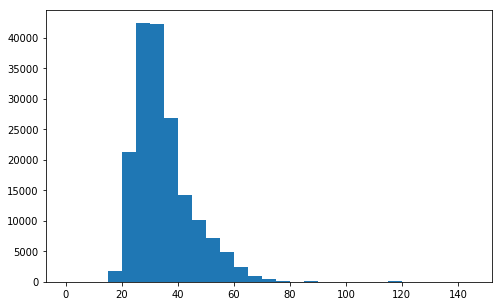

In [16]:
plt.figure(figsize = [8,5])
bins = np.arange(0, df_clean['member_age'].max() + 5, 5)
plt.hist(df_clean['member_age'].dropna(), bins = bins);

In [17]:
# Define: remove age outliers

#code
df_clean = df_clean.query('member_age <= 80')

#test
df_clean.member_age.describe()

count    174955.000000
mean         34.121997
std           9.875893
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          80.000000
Name: member_age, dtype: float64

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174955 entries, 0 to 183411
Data columns (total 23 columns):
duration_sec               174955 non-null int64
start_time                 174955 non-null datetime64[ns]
end_time                   174955 non-null datetime64[ns]
start_station_id           174760 non-null float64
start_station_name         174760 non-null object
start_station_latitude     174955 non-null float64
start_station_longitude    174955 non-null float64
end_station_id             174760 non-null float64
end_station_name           174760 non-null object
end_station_latitude       174955 non-null float64
end_station_longitude      174955 non-null float64
bike_id                    174955 non-null int64
user_type                  174955 non-null category
member_birth_year          174955 non-null float64
member_gender              174955 non-null category
bike_share_for_all_trip    174955 non-null category
start_day                  174955 non-null object
start_month 

In [19]:
# save the clean data

df_clean.to_csv('fordgobike_trips_clean.csv', index=False)

<a id="StructureAndFeatures"></a>

### What is the structure of your dataset?

> There are a total of 174572 entries, 0 to 183411 and 23 columns in the clean data set.The features are as follows: duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip, start_day, start_month, start_hr, end_day, end_month, end_hr, member_age.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in my dataset is duration and its  is dependence on other specifications from the dataset, specifically the users' charachtersitics such as user type, age and gender.I will look to answer questions such as: When most trips are taken in terms of time of day and day of the week, Average trip duration, Different user uasge i.e. subscriber or customer.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The main features I will use include time features as well as duration and also user features such as type, gender and age.

## Univariate Exploration
<a id="UnivariateExploration"></a>
 

#### What is the distribution of the categorical features?

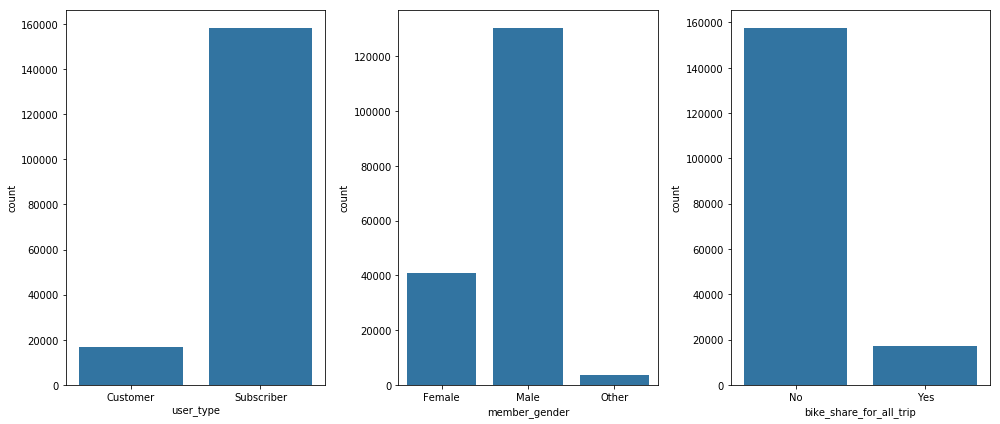

In [20]:
def myCountPlot(df, xVar, color = sb.color_palette()[0], order = None, ax = None):
    '''
    docstring : This function is used to compute the count of various variables. 
    inputs include variables.
    outputs are the graphs of those variables against their counts.
    '''
    if not ax:
        plt.figure(figsize = [14, 6])

    sb.countplot(data = df_clean, x = xVar, color = color, order = order, ax = ax);

fig, ax = plt.subplots(1,3, figsize = [14, 6])
myCountPlot(df_clean, 'user_type', ax = ax[0])
myCountPlot(df_clean, 'member_gender', ax = ax[1])
myCountPlot(df_clean, 'bike_share_for_all_trip', ax = ax[2])

plt.tight_layout()

>More people who use the service are subscribers rather than customers.

>There are more males using the service than females.

#### What is the average member age?

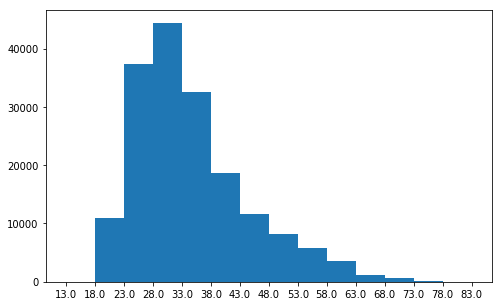

In [21]:
plt.figure(figsize = [8,5])
bins = np.arange(df_clean['member_age'].min() - 5, df_clean['member_age'].max() + 5, 5)
plt.hist(df_clean['member_age'], bins = bins)
plt.xticks(bins,bins);

> Majority of the members are between 23 and 38 years old with a mean age of 34.

#### What is the average trip duration?

In [22]:
df_clean.duration_sec.describe()

count    174955.000000
mean        704.518619
std        1642.433800
min          61.000000
25%         323.000000
50%         511.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

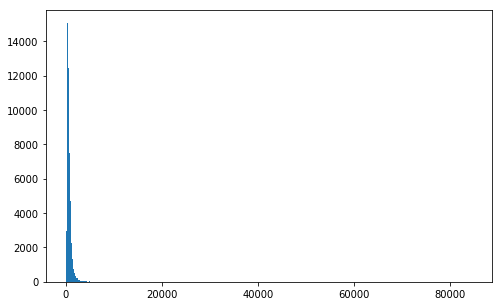

In [23]:
plt.figure(figsize = [8,5])
bins = np.arange(0, df_clean['duration_sec'].max() + 60, 60)
plt.hist(df_clean['duration_sec'], bins = bins);

''

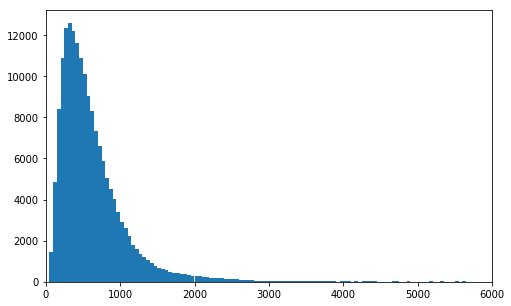

In [24]:
plt.figure(figsize = [8,5])
bins = np.arange(50, df_clean['duration_sec'].max() + 50, 50)
plt.hist(df_clean['duration_sec'], bins = bins);
plt.xlim([0, 6000])
;

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


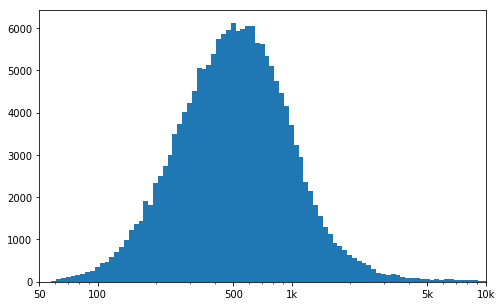

In [25]:
plt.figure(figsize = [8,5])
bins = 10 ** np.arange(np.log10(df_clean['duration_sec'].min()) - 0.025, np.log10(df_clean['duration_sec'].max()) + 0.025, 0.025)
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xlim([0, 6000])
plt.xticks([50, 1e2, 5e2, 1e3, 5e3, 1e4], [50, '100', '500', '1k', '5k', '10k']);

> Most trips are on the shorter side with a duration of between around 300 t0 1200 seconds. The majority of the rides are about 500 seconds long. 

#### What were the most popular start and end days and times of day?

In [26]:
ordinal_var_dict = {'start_day': ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday'],
                    'end_day': ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)

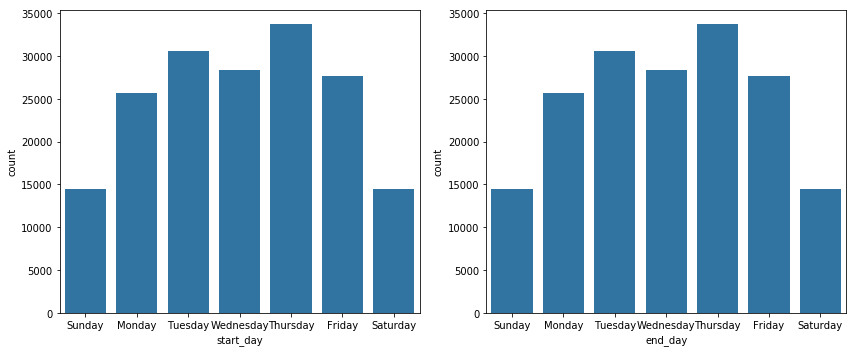

In [27]:

def myCountPlot(df, xVar, color = sb.color_palette()[0], order = None, ax = None):

    if not ax:
        plt.figure(figsize = [14, 6])

    sb.countplot(data = df_clean, x = xVar, color = color, order = order, ax = ax);

fig, ax = plt.subplots(1,2, figsize = [12, 5])

# Start Day
myCountPlot(df_clean, 'start_day', ax = ax[0])
# End Day
myCountPlot(df_clean, 'end_day', ax = ax[1])

plt.tight_layout();

> Most trips were started on Thursdays and most trips were ended on Thursdays as well. The weekends, i.e Saturdays and Sundays, had the lowest start and end days.

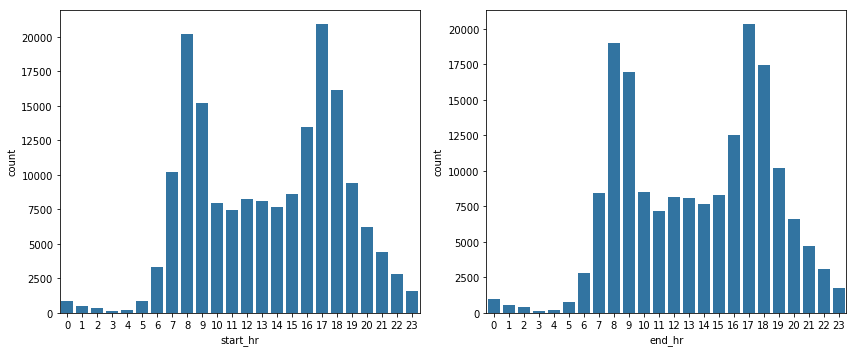

In [28]:
def myCountPlot(df, xVar, color = sb.color_palette()[0], order = None, ax = None):

    if not ax:
        plt.figure(figsize = [14, 6])

    sb.countplot(data = df_clean, x = xVar, color = color, order = order, ax = ax);

fig, ax = plt.subplots(1,2, figsize = [12, 5])

# Start Hour
myCountPlot(df_clean, 'start_hr', ax = ax[0])
# End Hour
myCountPlot(df_clean, 'end_hr', ax = ax[1])

plt.tight_layout();



> 8.00 a.m and 5:00 p.m are the busiest times of the day for use of the bike as they are the highest start and end times recorded. Lowest recorded time of usage is 3.00 a.m as recorded for both start time and end time.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most people who used the service were subscribers rather than customers. More males used the service than females. The average age of users of the service was 34 with most users being young, mostly between 23 and 38 years old. Majority of the trips were short ones, between 5 and 20 minutes. Thursday is the most popular day for the service. 8.00 a.m and 5:00 p.m are the busiest times of the day for use of the bike service and 3.00 a.m the least popular time.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, I performed some changes. For example, age had one value which was about 120. It is not normal for someone that old to ride a bike.

## Bivariate Exploration
<a id="BivariateExploration"></a>


#### What is the trip duration of the categorical features? Who rides more?

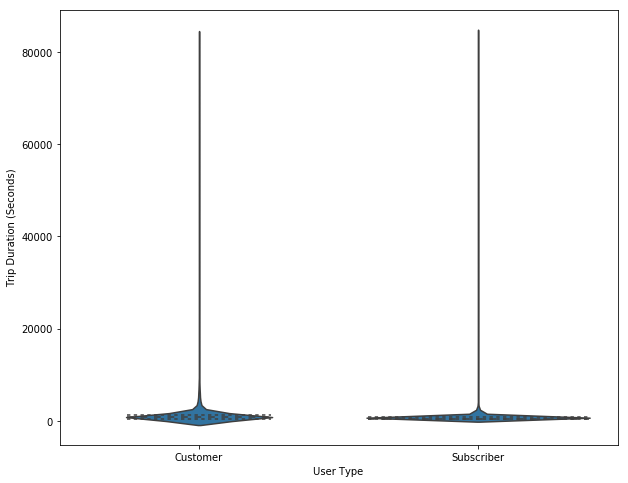

In [29]:
#df_clean['duration_min'] = df_clean['duration_sec']/60
color = sb.color_palette()[0]

plt.figure(figsize = [10, 8])
sb.violinplot(data = df_clean, x = 'user_type', y = 'duration_sec', color = color, inner = 'quartile', size = 7, aspect = 1.5)
plt.xlabel('User Type')
plt.ylabel('Trip Duration (Seconds)');

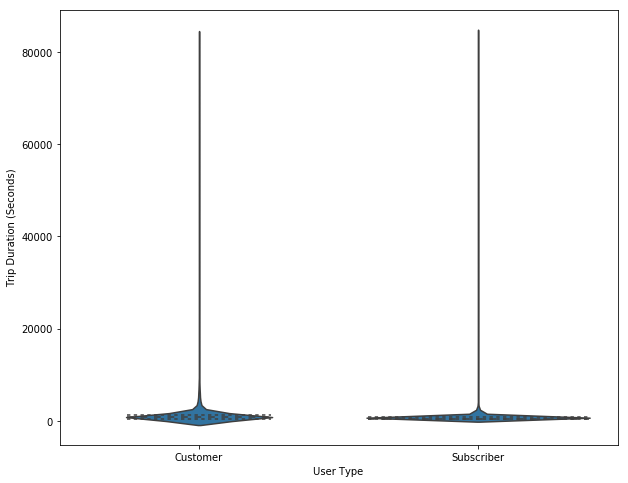

In [30]:
plt.figure(figsize = [10, 8])
sb.violinplot(data = df_clean, x = 'user_type', y = 'duration_sec', color = color, inner = 'quartile', size = 7, aspect = 1.5)
plt.xlabel('User Type')
plt.ylabel('Trip Duration (Seconds)');

In [31]:
Customer = df_clean['user_type'] == 'Customer'
Subscriber = df_clean['user_type'] == 'Subscriber'

In [32]:
df_clean[Customer].duration_sec.mean()

1310.3206593671039

In [33]:
df_clean[Subscriber].duration_sec.mean()

640.92074930684066

> Customers of the service seem to ride for a longer time than subsribers do.

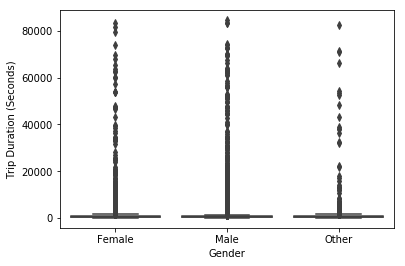

In [34]:
#plt.figure(figsize = [6, 6])
sb.boxplot(data = df_clean, x = 'member_gender', y = 'duration_sec', color = color);
plt.xlabel('Gender');
plt.ylabel('Trip Duration (Seconds)');

> Male riders seem to have shorter ride time than people of other genders.

''

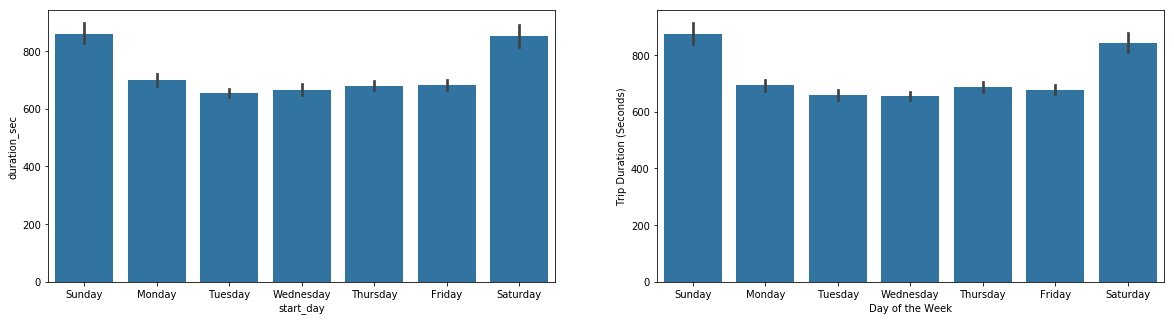

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey = False)

color = sb.color_palette()[0]

# Start Day
sb.barplot(data = df_clean, x = 'start_day', y = 'duration_sec', color = color,  ax = ax[0])

plt.xlabel('Day of the Week')
plt.ylabel('Trip Duration (Seconds)');

# End Day
sb.barplot(data = df_clean, x = 'end_day', y = 'duration_sec', color = color,  ax = ax[1])

plt.xlabel('Day of the Week')
plt.ylabel('Trip Duration (Seconds)')
;

> Saturday and Sunday are the days of the week in which riders ride the longest.

''

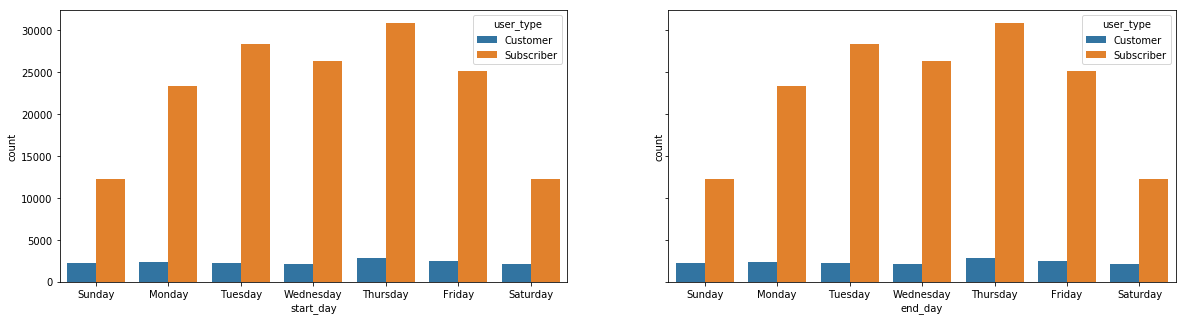

In [47]:
 
fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey = True)

color = sb.color_palette()[0]

# Start Day
sb.countplot(data = df_clean, x = 'start_day', hue = 'user_type', ax = ax[0])

# End Day
sb.countplot(data = df_clean, x = 'end_day', hue = 'user_type', ax = ax[1])
#plt.xlabel('Day of Week')
#plt.xticks(rotation=45)
;

> Subscribers have higher use for this service and especially on Thursdays.

''

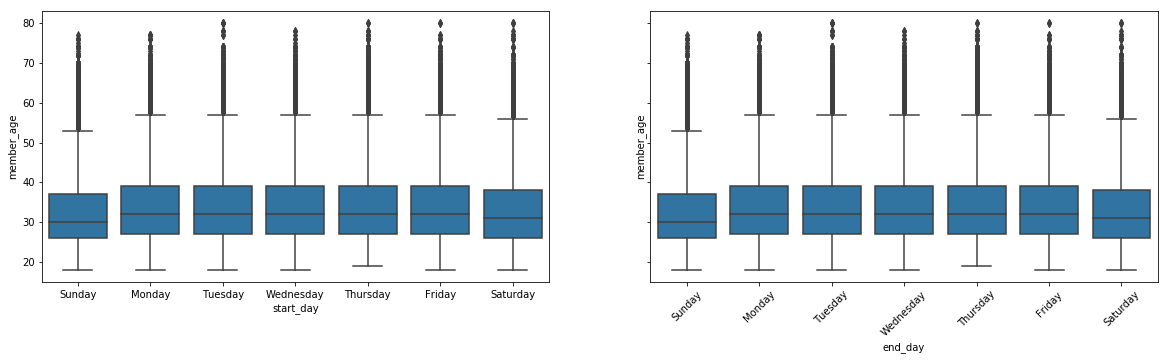

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey = True)

color = sb.color_palette()[0]

sb.boxplot(data = df_clean, x = 'start_day', y = 'member_age', color = color, ax = ax[0])
plt.xlabel('Day of Week')
plt.ylabel('Member Age')
plt.xticks(rotation=45)
;
sb.boxplot(data = df_clean, x = 'end_day', y = 'member_age', color = color, ax = ax[1])
#plt.xlabel('Day of Week')
#plt.ylabel('Member Age')
#plt.xticks(rotation=45)
;

> Riders who rented bikes during the weekdays are older. Over the weekends, younger people use the service more. 

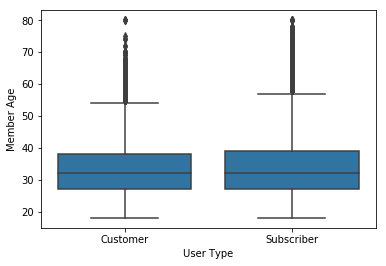

In [38]:
sb.boxplot(data = df_clean, x = 'user_type', y = 'member_age', color = color)
plt.xlabel('User Type')
plt.ylabel('Member Age');

> Subscribers seem to be older than Customers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Customers of the service seem to have longer riding time than subsribers. Females and Other genders have longer riding times than males. The weekends is when users take the longest rides, up to 13 minutes. Subscribers have higher use for this service and especially on Thursdays. Subscribers seem to be older than Customers. Riders who rented bikes during the weekdays are older. Over the weekends, younger people use the service more. 


## Multivariate Exploration
<a id="MultivariateExploration"></a>


#### User type Vs. Day of the week Vs. Duration of trip.

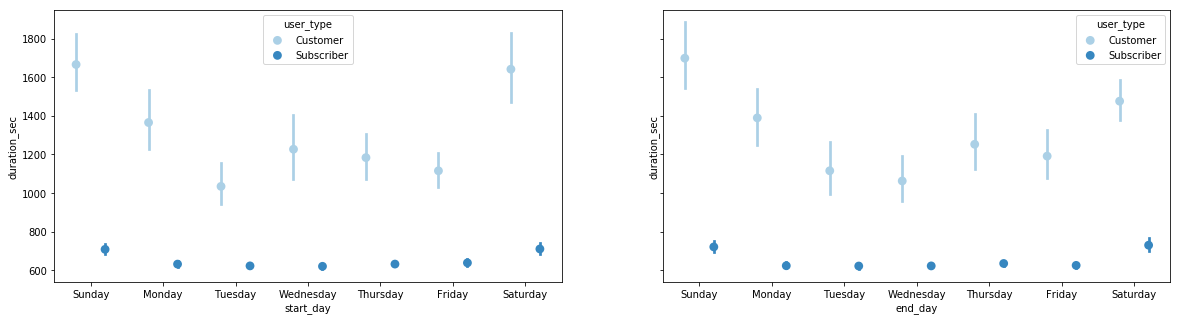

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey = True)

color = sb.color_palette()[0]

sb.pointplot(data = df_clean, x ='start_day', y = 'duration_sec', hue = 'user_type', palette = 'Blues', 
             linestyles = '', dodge = 0.4, ax = ax[0])
sb.pointplot(data = df_clean, x ='end_day', y = 'duration_sec', hue = 'user_type', palette = 'Blues', 
             linestyles = '', dodge = 0.4, ax = ax[1])

>Customers tend to travel for longer durations than subscribers. Both customers and subscribers use the service for longer durations on the weekends. 

#### Gender Vs. User Type Vs. Duration of trip.

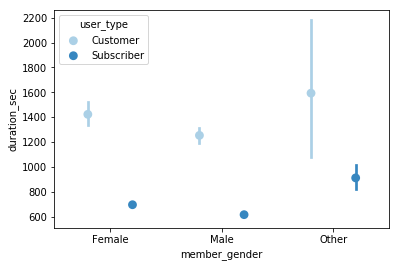

In [40]:
sb.pointplot(data = df_clean, x ='member_gender', y = 'duration_sec', hue = 'user_type', palette = 'Blues', 
             linestyles = '', dodge = 0.4)

> Customers of 'Other' gender tends to ride for a longest compared to all other customers annd subscribers.

#### Time of day Vs. User Type Vs. Duration of trip.

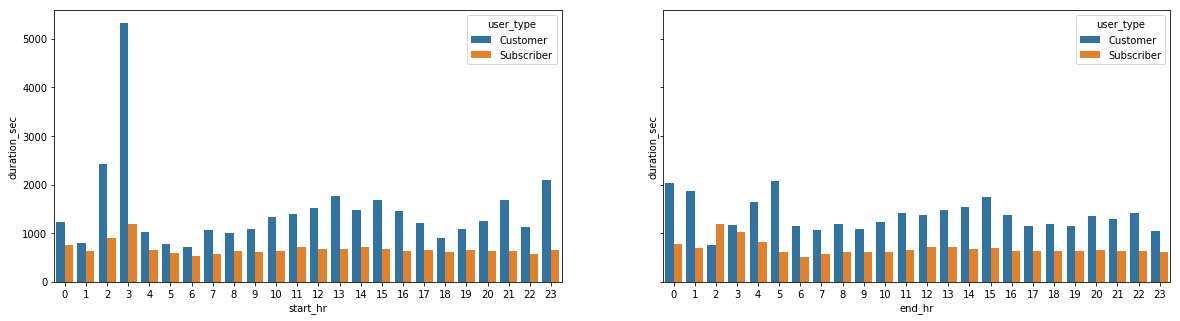

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey = True)

color = sb.color_palette()[0]

sb.barplot(data = df_clean, x = 'start_hr', y = 'duration_sec',  hue = 'user_type', ci = None, ax = ax[0])
sb.barplot(data = df_clean, x = 'end_hr', y = 'duration_sec',  hue = 'user_type', ci = None, ax = ax[1])


> Customers generally have longer durations throughout all hours of the day. We can notice that subscribers have a longer duration at 2.00 a.m. in the second plot.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Customers tend to travel for longer durations than subscribers. Both customers and subscribers use the service for longer durations on the weekends. Customers generally have longer durations throughout all hours of the day than subscribers.

### Were there any interesting or surprising interactions between features?

> Customers start the use of the service at 3:00 a.m. which is quite an odd hour. Subscribers end their rides at 2:00 a.m the most, and even more than customers. 

## Conclusions
<a id="Conclusions"></a>

> The features I was more so interested in were user type, member gender and member age. I wanted to find out how much these users spend on trips.

> Generally, customers spend more time using the service than subscribers, which is interesting. Other gender users ride for longer than the other 2 genders. Most users of the service are younger.

In [42]:
#save to csv
df_clean.to_csv('fordgobike_trips_clean.csv', index=False)